1).Prepare a classification model using SVM for salary data
Data Description:

age -- age of a person workclass -- A work class is a grouping of work education -- Education of an individuals maritalstatus -- Marital status of an individulas occupation -- occupation of an individuals relationship -- race -- Race of an Individual sex -- Gender of an Individual capitalgain -- profit received from the sale of an investment capitalloss -- A decrease in the value of a capital asset hoursperweek -- number of hours work per week native -- Native of an individual Salary -- salary of an individual

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
test=pd.read_csv("SalaryData_Test(1).csv")
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [8]:
train=pd.read_csv("SalaryData_Train(1).csv")
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
test.shape

(15060, 14)

In [10]:
train.shape

(30161, 14)

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [13]:
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [14]:
test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [15]:
test.describe().corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.999993,-0.001146,0.970148,0.999999
educationno,0.999993,1.000000,-0.004448,0.969352,0.999990
capitalgain,-0.001146,-0.004448,1.000000,0.241228,-0.000523
capitalloss,0.970148,0.969352,0.241228,1.000000,0.970296
hoursperweek,0.999999,0.999990,-0.000523,0.970296,1.000000


In [16]:
train.describe().corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.999998,0.150109,0.990040,1.000000
educationno,0.999998,1.000000,0.148470,0.989807,0.999997
capitalgain,0.150109,0.148470,1.000000,0.287764,0.150408
capitalloss,0.990040,0.989807,0.287764,1.000000,0.990082
hoursperweek,1.000000,0.999997,0.150408,0.990082,1.000000


In [17]:
train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [18]:
test.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [19]:
train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [20]:
test.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [21]:
#finding the special characters in the dataframe
train.isin(['?']).sum(axis=0)

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [22]:
test.isin(['?']).sum(axis=0)

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

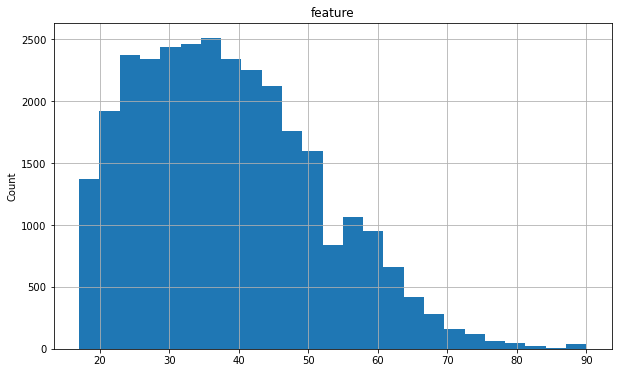

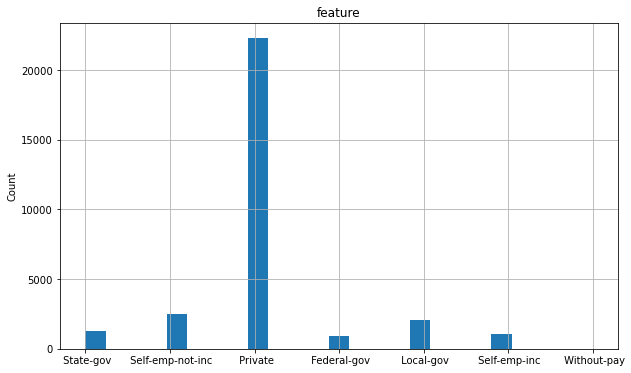

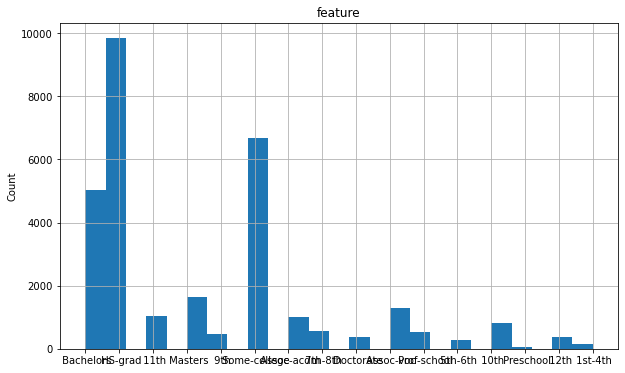

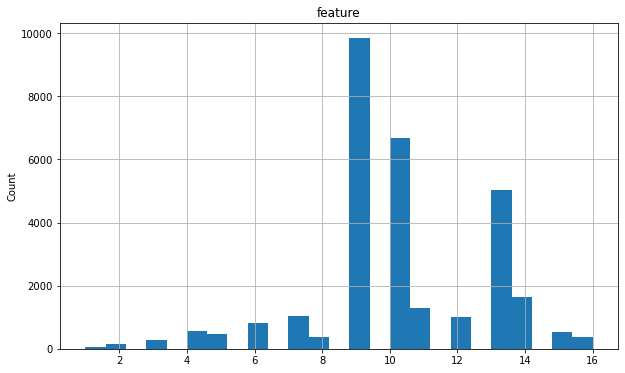

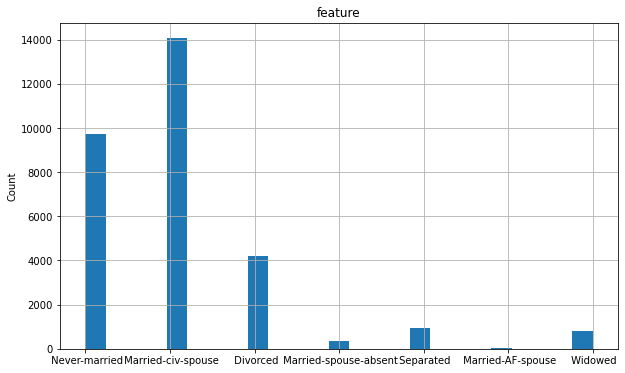

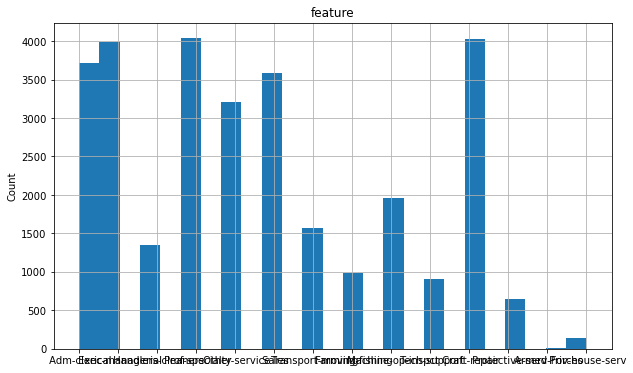

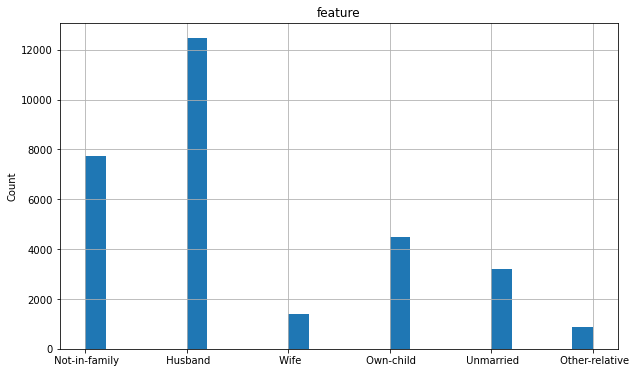

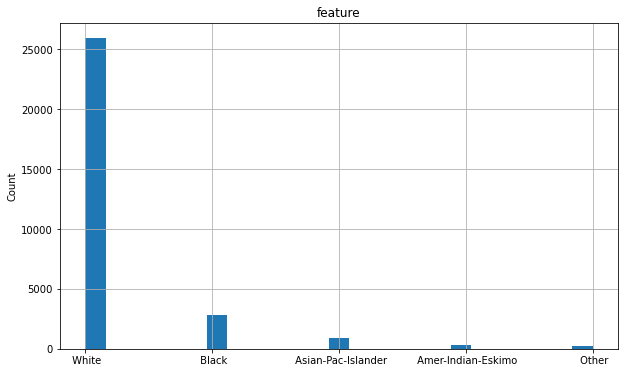

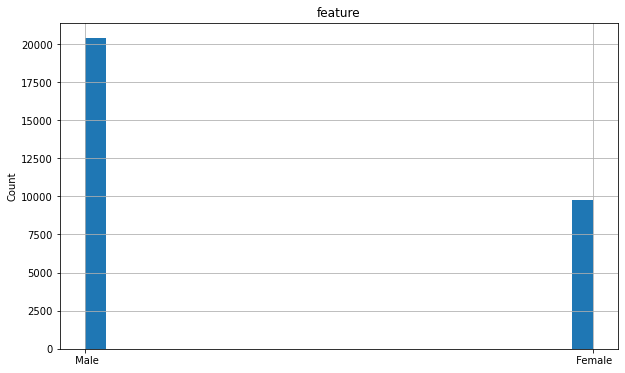

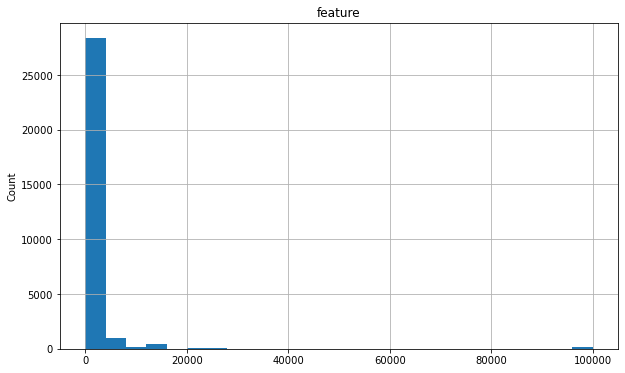

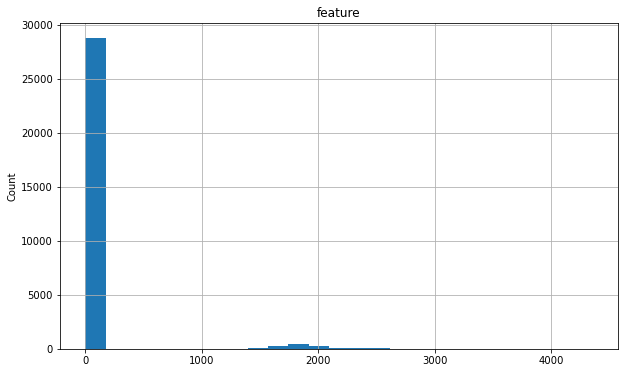

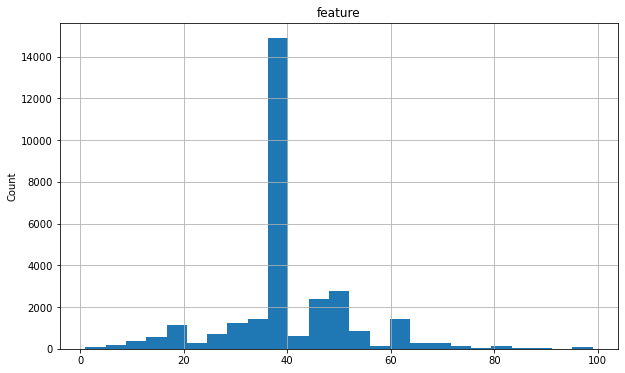

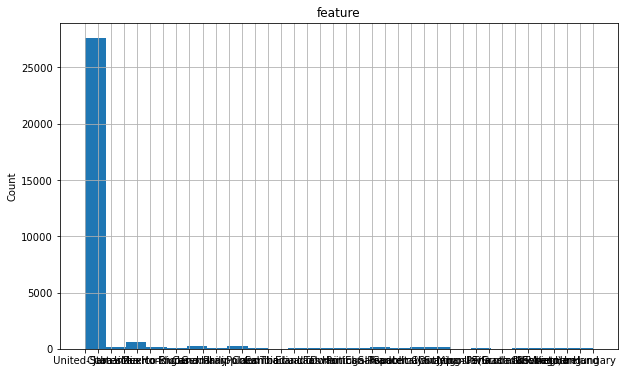

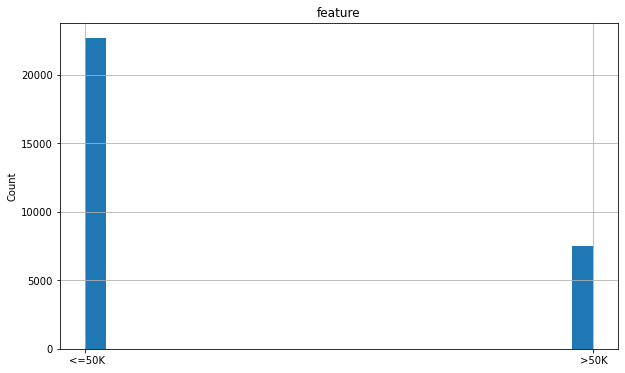

In [23]:
for feature in train.columns:
    train_copy = train.copy()
    plt.figure(figsize=(10, 6))
    train_copy[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title('feature')
    plt.show()
    

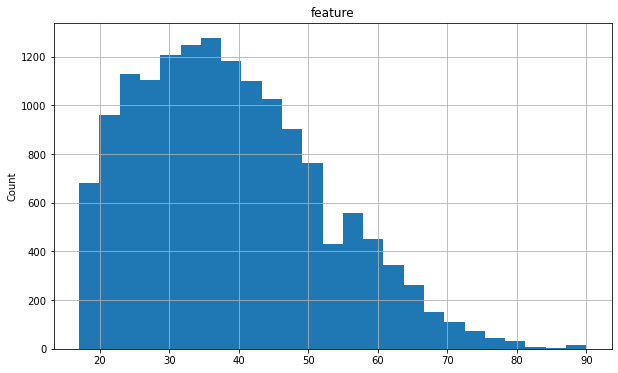

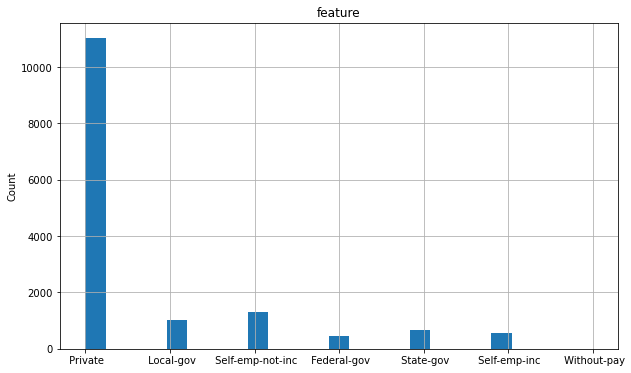

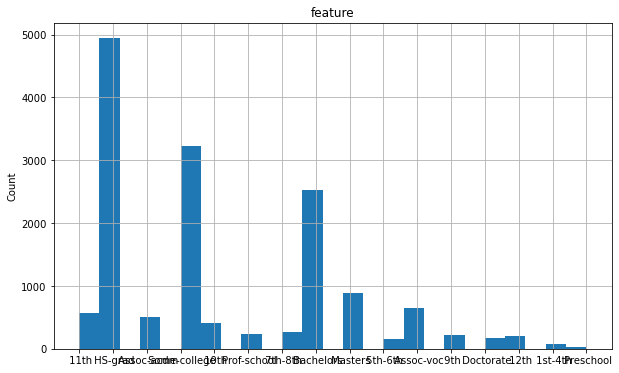

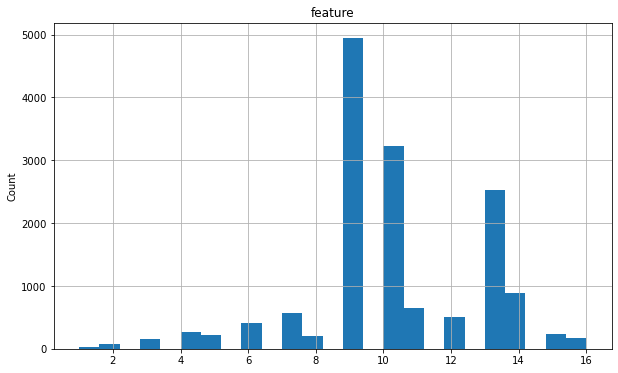

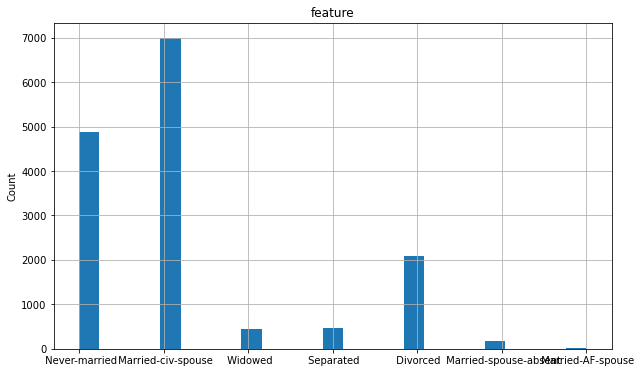

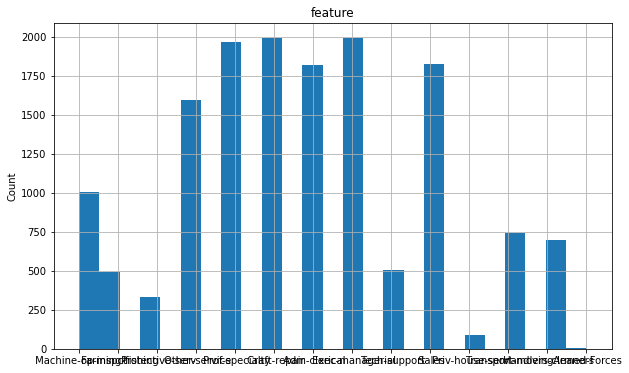

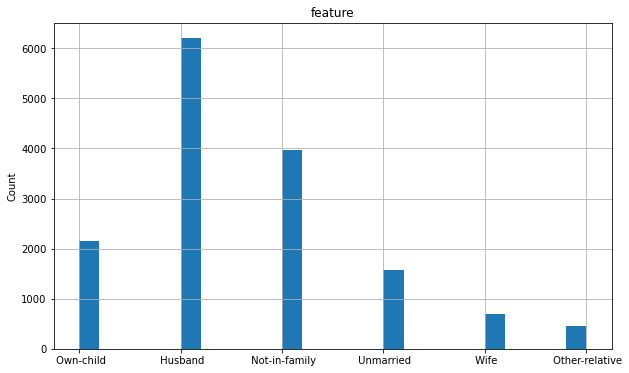

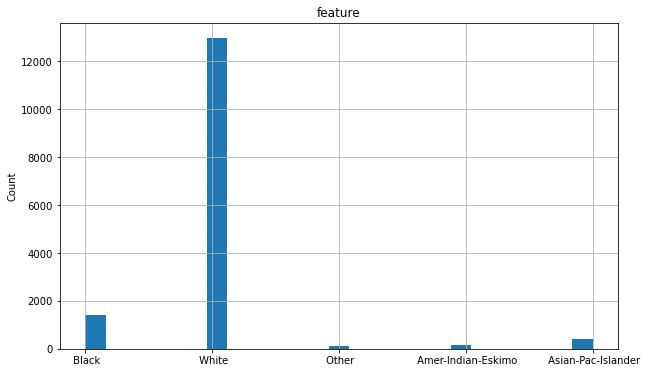

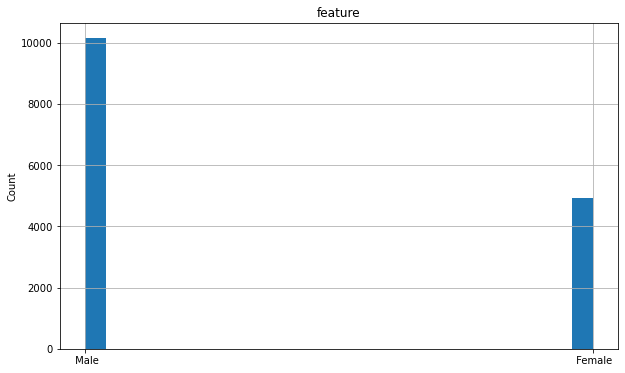

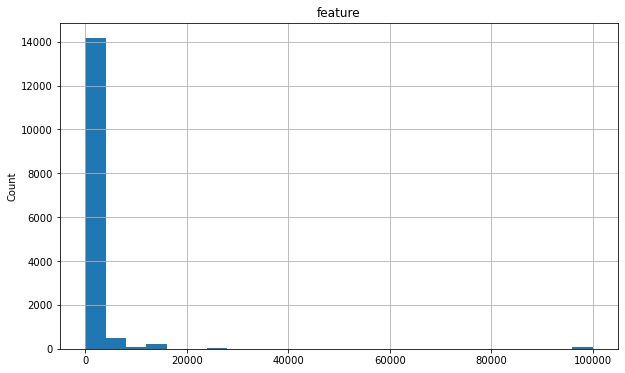

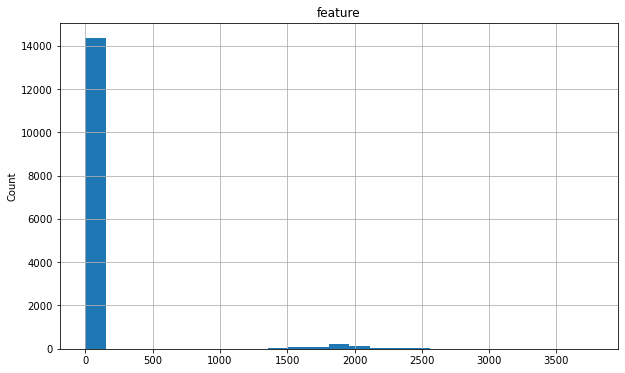

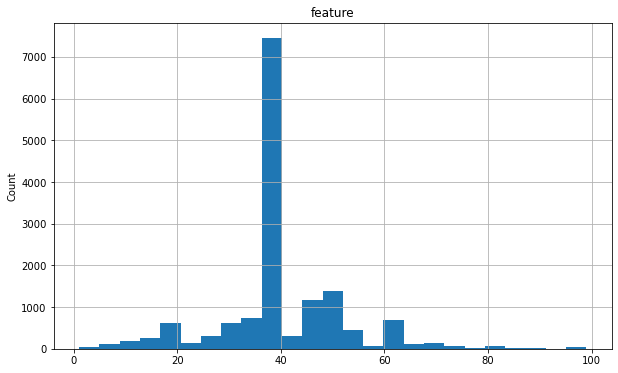

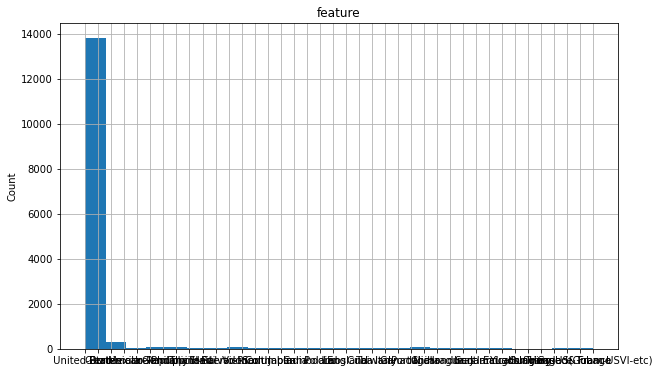

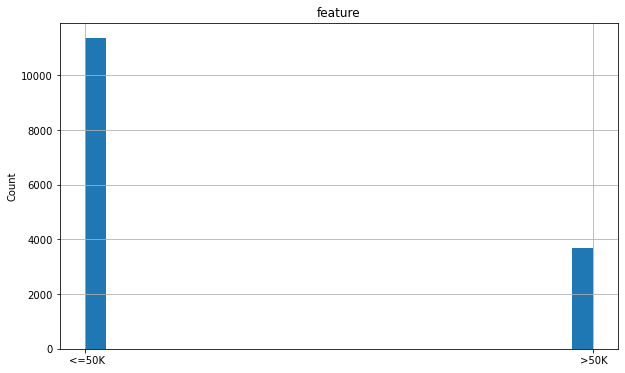

In [24]:
for feature in test.columns:
    test_copy = test.copy()
    plt.figure(figsize=(10, 6))
    test_copy[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title('feature')
    plt.show()

In [ ]:
# Correlation matrix
correlation_matrix = train.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Correlation matrix
correlation_matrix = test.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

<Figure size 720x576 with 0 Axes>

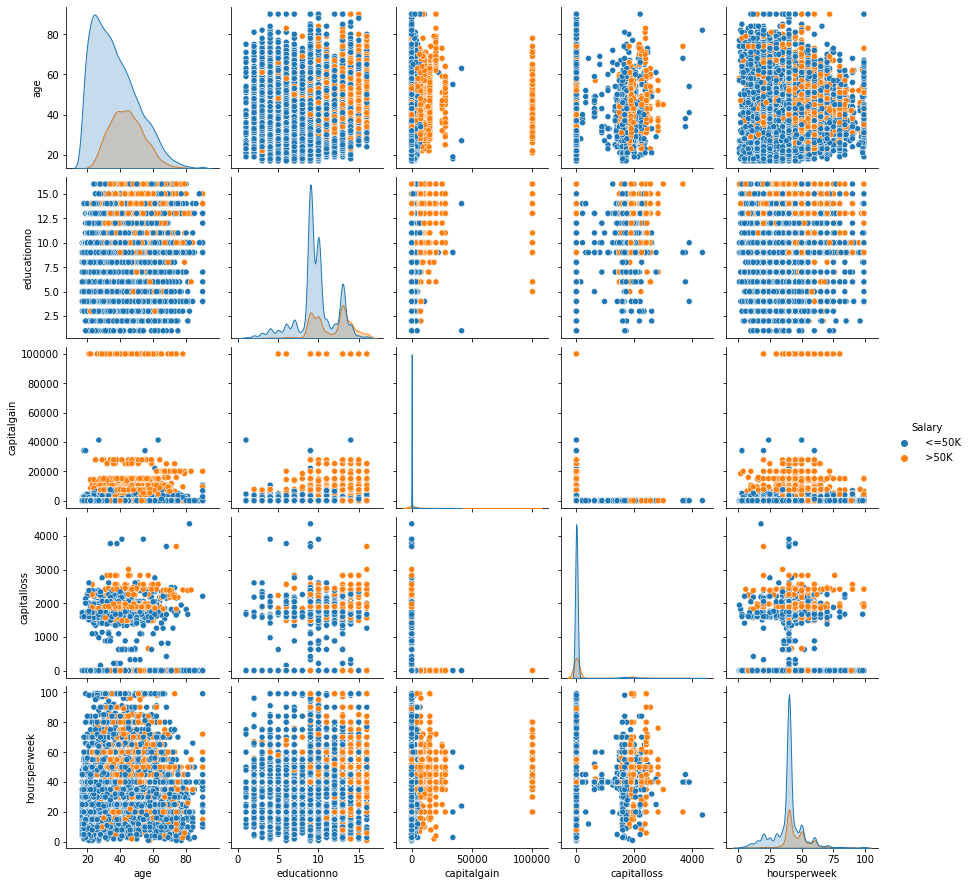

In [27]:
#pairwise plot of all the features
plt.figure(figsize=(10,8))
sns.pairplot(train,hue='Salary')
plt.show()

<Figure size 720x576 with 0 Axes>

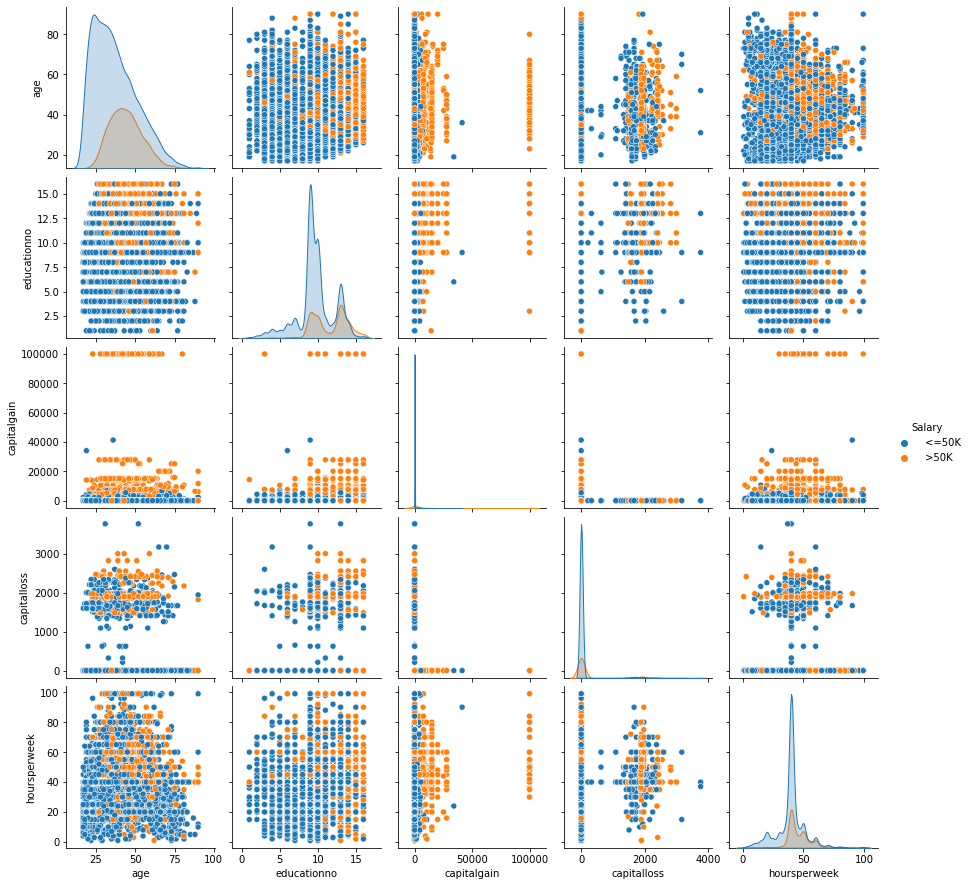

In [28]:
#pairwise plot of all the features
plt.figure(figsize=(10,8))
sns.pairplot(test,hue='Salary')
plt.show()

In [29]:
# find categorical variables

categorical = [var for var in train.columns if train[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [30]:
# find categorical variables

categorical = [var for var in test.columns if test[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [31]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
LE

LabelEncoder()

In [32]:
train['workclass']=LE.fit_transform(train['workclass'])
train['education']=LE.fit_transform(train['education'])
train['maritalstatus']=LE.fit_transform(train['maritalstatus'])
train['occupation']=LE.fit_transform(train['occupation'])
train['relationship']=LE.fit_transform(train['relationship'])
train['race']=LE.fit_transform(train['race'])
train['sex']=LE.fit_transform(train['sex'])
train['native']=LE.fit_transform(train['native'])
train['Salary']=LE.fit_transform(train['Salary'])
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [33]:
test['workclass']=LE.fit_transform(test['workclass'])
test['education']=LE.fit_transform(test['education'])
test['maritalstatus']=LE.fit_transform(test['maritalstatus'])
test['occupation']=LE.fit_transform(test['occupation'])
test['relationship']=LE.fit_transform(test['relationship'])
test['race']=LE.fit_transform(test['race'])
test['sex']=LE.fit_transform(test['sex'])
test['native']=LE.fit_transform(test['native'])
test['Salary']=LE.fit_transform(test['Salary'])
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0


In [34]:
x_train=train.drop('Salary',axis=1)
y_train=train['Salary']
x_test=test.drop('Salary',axis=1)
y_test=test['Salary']

In [35]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: Salary, Length: 30161, dtype: int32

In [36]:
from sklearn.svm import SVC

In [ ]:
svclass=SVC()
svclass.fit(x_train,y_train)

In [ ]:
Y_pred_train = svclass.predict(x_train)
Y_pred_test  = svclass.predict(x_test)

In [ ]:
# step6:  metrics
from sklearn.metrics import accuracy_score
ac_train = accuracy_score(y_train,Y_pred_train)
ac_test = accuracy_score(y_test,Y_pred_test)
print("Training Accuracy:", ac_train.round(2))

print("Test Accuracy:", ac_test.round(2))

In [ ]:
##Normalmization
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
x_train = norm_func(x_train)
x_test =  norm_func(x_test)

In [ ]:
from sklearn.svm import SVC
model_linear = SVC(kernel = "linear",random_state=40,gamma=0.1,C=1.0)
model_linear.fit(x_train,y_train)

In [ ]:
pred_test_linear = model_linear.predict(x_test)

In [ ]:
np.mean(pred_test_linear==y_test) 

In [ ]:
# Kernel = poly
model_poly = SVC(kernel = "poly",random_state=40,gamma=0.1,C=1.0)
model_poly.fit(x_train,y_train)
pred_test_poly = model_poly.predict(x_test)

In [ ]:
np.mean(pred_test_poly==y_test)

In [ ]:
# kernel = rbf
model_rbf = SVC(kernel = "rbf",random_state=40,gamma=0.1,C=1.0)
model_rbf.fit(x_train,y_train)
pred_test_rbf = model_rbf.predict(x_test)

In [ ]:
np.mean(pred_test_rbf==y_test)

In [ ]:
#'sigmoid'
model_sig = SVC(kernel = "sigmoid",random_state=40,gamma=0.1,C=1.0)
model_sig.fit(x_train,y_train)
pred_test_sig = model_rbf.predict(x_test)

In [ ]:
np.mean(pred_test_sig==y_test)

In [ ]:
from sklearn.metrics import accuracy_score
ac_train = accuracy_score(y_train,Y_pred_train)
ac_test = accuracy_score(y_test,Y_pred_test)
print("Training Accuracy:", ac_train.round(2))
print("Test Accuracy:", ac_test.round(2))

classify the Size_Categorie using SVM

month	month of the year: 'jan' to 'dec'
day	day of the week: 'mon' to 'sun'
FFMC	FFMC index from the FWI system: 18.7 to 96.20
DMC	DMC index from the FWI system: 1.1 to 291.3
DC	DC index from the FWI system: 7.9 to 860.6
ISI	ISI index from the FWI system: 0.0 to 56.10
temp	temperature in Celsius degrees: 2.2 to 33.30
RH	relative humidity in %: 15.0 to 100
wind	wind speed in km/h: 0.40 to 9.40
rain	outside rain in mm/m2 : 0.0 to 6.4
Size_Categorie 	the burned area of the forest ( Small , Large)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("forestfires (1).csv")
df

# EDA

In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df.dtypes

In [ ]:
df.describe()

In [ ]:
df.describe().corr()

In [ ]:
#finding the special characters in the dataframe
df.isin(['?']).sum(axis=0)

In [ ]:
for feature in df.columns:
    df_copy = df.copy()
    plt.figure(figsize=(10, 6))
    df_copy[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title('feature')
    plt.show()
    

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,18)) 
sns.heatmap(df.describe(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
plt.figure(figsize=(20,20))
sns.lmplot(x='temp',y='RH',data=df,hue='size_category' ,fit_reg=False,col='day',row='month')
plt.show()

In [ ]:
label_data=df['size_category'].value_counts()

explode=(0.1,0.1)
plt.figure(figsize=(12,10))
patches, texts, pcts= plt.pie(label_data,labels=label_data.index,colors=['blue','red'],pctdistance=0.65,shadow=True,
                             startangle=90,explode=explode,autopct='%1.1f%%',
                             textprops={'fontsize':17,'color':'black','weight':'bold','family':'serif'})
plt.setp(pcts,color='white')
hfont={'weight':'bold','family':'serif'}
plt.title('Types of Fire',size=20,**hfont)

centre_circle=plt.Circle((0,0),0.40,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(['Small','Large'],loc="upper right")
plt.show()

In [ ]:
df.drop('month',axis=1,inplace=True)
df.drop('day',axis=1,inplace=True)

In [ ]:
features = ['monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul','monthjun', 
            'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep']
plt.figure(figsize=(10, 30))
for i, feature in enumerate(features):
    plt.subplot(7, 3, i+1)
    sns.countplot(x=feature, hue='size_category', data=df)
    plt.legend(["Small Fire", "Large Fire"])

plt.tight_layout()
plt.show()

In [ ]:
df.head()

# SPLITTING DATA X AND Y

In [ ]:
X=df.iloc[:,0:27]
Y=df['size_category']

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
LE

In [ ]:
Y=LE.fit_transform(df['size_category'])

# DATA PARTITION

In [ ]:
# Data partition
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30)


In [ ]:
X_train

In [ ]:
X_test

In [ ]:
Y_train

In [ ]:
Y_test

In [ ]:
# step5: support vector machine
from sklearn.svm import SVC
svclass = SVC(C=1.0,kernel='linear')
svclass.fit(X_train,Y_train)

In [ ]:
Y_pred_train = svclass.predict(X_train)
Y_pred_test  = svclass.predict(X_test)

In [ ]:
# step6:  metrics
from sklearn.metrics import accuracy_score
ac_train = accuracy_score(Y_train,Y_pred_train)
ac_test = accuracy_score(Y_test,Y_pred_test)

print("Training Accuracy:", ac_train.round(2))
print("Test Accuracy:", ac_test.round(2))

In [ ]:
#====================================================================
# cross validation
#====================================================================

from sklearn.svm import SVC
svclass = SVC(C=1.0,kernel='linear')

training_accuracy = []
test_accuracy = []

for i in range(1,100):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=i)
    svclass.fit(X_train,Y_train)
    Y_pred_train = svclass.predict(X_train)
    Y_pred_test  = svclass.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

k1 = pd.DataFrame(training_accuracy)
print("Cross validation training results:",k1.mean().round(2))
k2 = pd.DataFrame(test_accuracy)
print("Cross validation test results:",k2.mean().round(2))

In [ ]:
# Kernel = poly
model_poly = SVC(kernel = "poly",random_state=40,gamma=0.1,C=1.0)
model_poly.fit(X_train,Y_train)
pred_test_poly = model_poly.predict(X_test)

In [ ]:
np.mean(pred_test_poly==Y_test)

In [ ]:
# kernel = rbf radial basis function
model_rbf = SVC(kernel = "rbf",random_state=40,gamma=0.1,C=1.0)
model_rbf.fit(X_train,Y_train)
pred_test_rbf = model_rbf.predict(X_test)

In [ ]:
np.mean(pred_test_rbf==Y_test)

In [ ]:
#'sigmoid'
model_sig = SVC(kernel = "sigmoid",random_state=40,gamma=0.1,C=1.0)
model_sig.fit(X_train,Y_train)
pred_test_sig = model_sig.predict(X_test)

In [ ]:
np.mean(pred_test_sig==Y_test)